# Exploratory data analysis on Haberman Dataset

In [1]:
#import all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Assigning column names for the dataset
col_names=['Age', 'operation_year', 'axil_nodes_det', 'survival_status']
haberman=pd.read_csv("haberman.csv", names=col_names)

## objective

To Classify whether the patient will survive or not after the five years of surgery based on the factors age, operation year, axil nodes detected.

 To analyse the important features that are mostly helpful for the classification.

In [3]:
haberman.head()

,Age,operation_year,axil_nodes_det,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
haberman.tail()

,Age,operation_year,axil_nodes_det,survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
haberman.shape

(306, 4)

In [6]:
haberman.columns

Index([u'Age', u'operation_year', u'axil_nodes_det', u'survival_status'], dtype='object')

In [7]:
haberman['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### so in the given dataset we have a total of value '1' as 225 datapoints and value '2' as 81 datapoints.

In [8]:
haberman['survival_status']=haberman['survival_status'].map({1:'yes', 2:'no'})

In [9]:
haberman.head()

,Age,operation_year,axil_nodes_det,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [10]:
haberman.tail()

,Age,operation_year,axil_nodes_det,survival_status
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


In [11]:
haberman['survival_status'].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

In [12]:
haberman.describe()

,Age,operation_year,axil_nodes_det
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [13]:
haberman_yes=haberman[haberman['survival_status']=='yes']
haberman_no=haberman[haberman['survival_status']=='no']

# Histogram/Density Plots

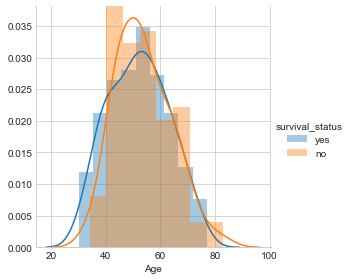

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='survival_status', size=4)\
.map(sns.distplot,'Age')\
.add_legend()
plt.show()

### Observation:
Both the calsses ('yes' and 'no') of survival_status for the Age feature are overlapping very much. so we are not able to extract relevent information.

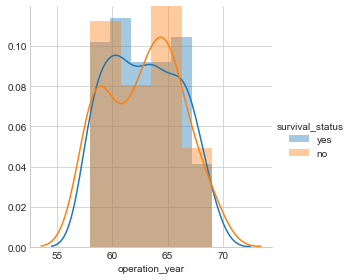

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='survival_status', size=4)\
.map(sns.distplot,'operation_year')\
.add_legend()
plt.show()

#### Observation
Similarly like the above feature, 'operation year' feature as well overlapping almost completely. Therefore we are not able to extract relevent information from the above plot.

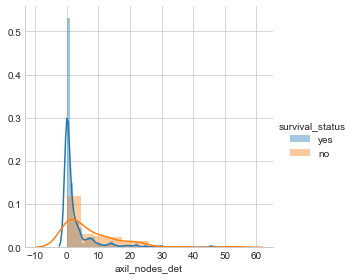

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='survival_status', size=4)\
.map(sns.distplot,'axil_nodes_det')\
.add_legend()
plt.show()

#### Observation
Here with this feature 'axil_nodes_det' we can observe that more than 50% of patients who survived has axil_nodes from range 0 to 4.

# PDF and CDF

In [17]:
haberman_y=haberman.loc[haberman['survival_status']=='yes']
haberman_n=haberman.loc[haberman['survival_status']=='no']

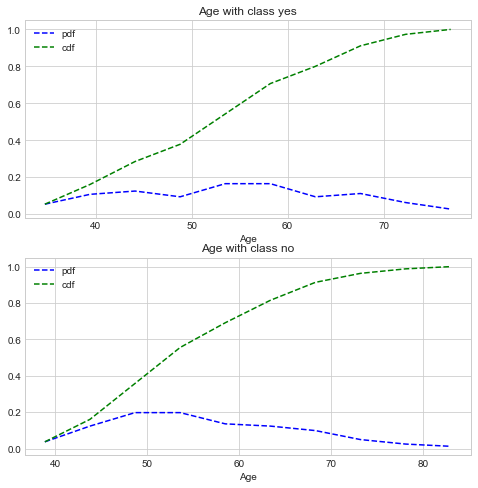

In [18]:
counts, bin_edges=np.histogram(haberman_y['Age'], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
counts1, bin_edges1=np.histogram(haberman_n['Age'], bins=10, density=True)
pdf1=counts1/sum(counts1)
cdf1=np.cumsum(pdf1)
plt.figure(1,figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(bin_edges[1:],pdf,'b--', label='pdf')
plt.plot(bin_edges[1:],cdf, 'g--', label='cdf')
plt.xlabel('Age')
plt.title('Age with class yes')
plt.legend()
plt.subplot(2,1,2)
plt.title('Age with class no')
plt.xlabel('Age')
plt.plot(bin_edges1[1:],pdf1,'b--', label='pdf')
plt.plot(bin_edges1[1:],cdf1, 'g--', label='cdf')
plt.legend()
plt.show()

Observation:
20 % of patients who survied are of age less tha 40.

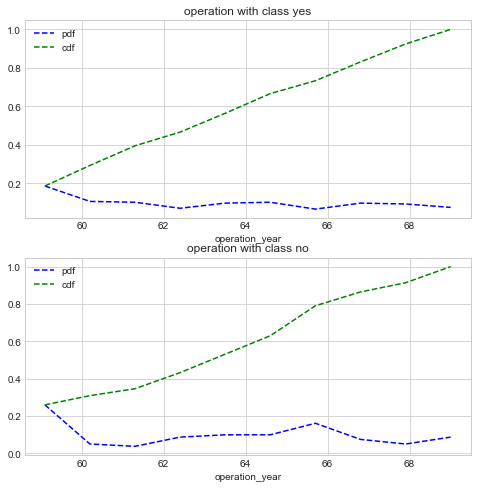

In [19]:
counts, bin_edges=np.histogram(haberman_y['operation_year'], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
counts1, bin_edges1=np.histogram(haberman_n['operation_year'], bins=10, density=True)
pdf1=counts1/sum(counts1)
cdf1=np.cumsum(pdf1)
plt.figure(1,figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(bin_edges[1:],pdf,'b--', label='pdf')
plt.plot(bin_edges[1:],cdf, 'g--', label='cdf')
plt.xlabel('operation_year')
plt.title('operation with class yes')
plt.legend()
plt.subplot(2,1,2)
plt.title('operation with class no')
plt.xlabel('operation_year')
plt.plot(bin_edges1[1:],pdf1,'b--', label='pdf')
plt.plot(bin_edges1[1:],cdf1, 'g--', label='cdf')
plt.legend()
plt.show()

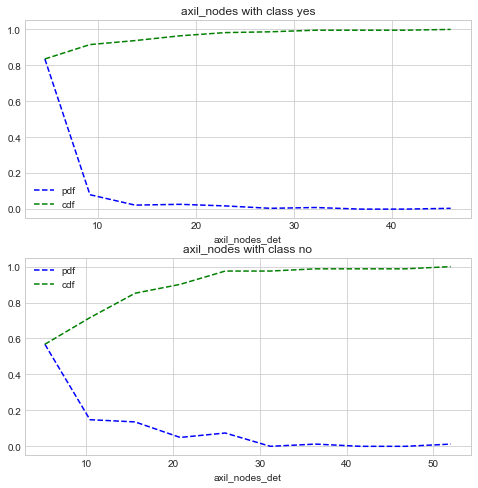

In [20]:
counts, bin_edges=np.histogram(haberman_y['axil_nodes_det'], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
counts1, bin_edges1=np.histogram(haberman_n['axil_nodes_det'], bins=10, density=True)
pdf1=counts1/sum(counts1)
cdf1=np.cumsum(pdf1)
plt.figure(1,figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(bin_edges[1:],pdf,'b--', label='pdf')
plt.plot(bin_edges[1:],cdf, 'g--', label='cdf')
plt.xlabel('axil_nodes_det')
plt.title('axil_nodes with class yes')
plt.legend()
plt.subplot(2,1,2)
plt.title('axil_nodes with class no')
plt.xlabel('axil_nodes_det')
plt.plot(bin_edges1[1:],pdf1,'b--', label='pdf')
plt.plot(bin_edges1[1:],cdf1, 'g--', label='cdf')
plt.legend()
plt.show()

Obesrvation:
82 % of the patients who survived are axil_nodes with less than or eqaul to 5, 
And patients with axil_nodes grather than 48(approx) has not survived.

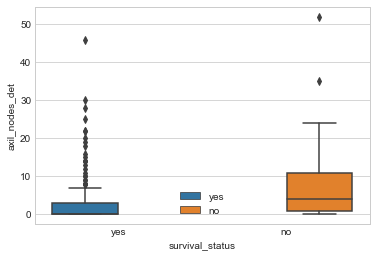

In [21]:
sns.boxplot(x='survival_status',y='axil_nodes_det',hue='survival_status',data=haberman)
plt.legend()
plt.show()

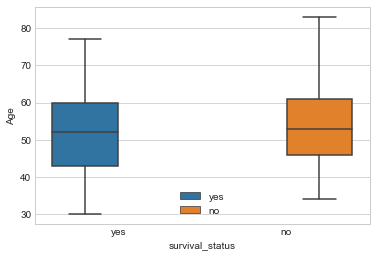

In [22]:
sns.boxplot(x='survival_status',y='Age',hue='survival_status',data=haberman)
plt.legend()
plt.show()

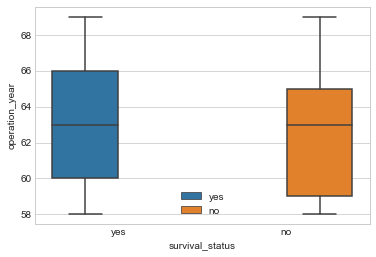

In [23]:
sns.boxplot(x='survival_status',y='operation_year',hue='survival_status',data=haberman)
plt.legend()
plt.show()

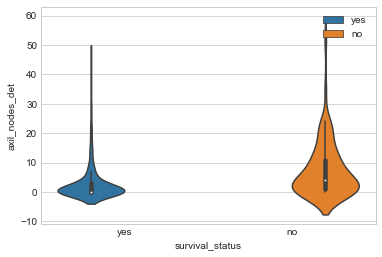

In [24]:
sns.violinplot(x='survival_status', y='axil_nodes_det',hue='survival_status', data=haberman)
plt.legend()
plt.show()

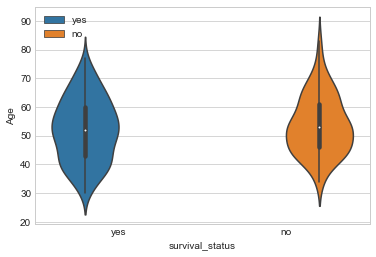

In [25]:
sns.violinplot(x='survival_status', y='Age',hue='survival_status', data=haberman)
plt.legend()
plt.show()

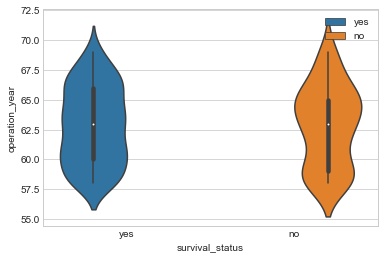

In [26]:
sns.violinplot(x='survival_status', y='operation_year',hue='survival_status', data=haberman)
plt.legend()
plt.show()

# Scatterplot and pairplots

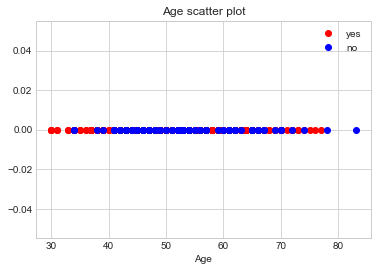

In [27]:
plt.plot(haberman_y['Age'],np.zeros_like(haberman_y['Age']),'ro',label='yes')
plt.plot(haberman_n['Age'],np.zeros_like(haberman_n['Age']),'bo',label='no')
plt.title('Age scatter plot')
plt.xlabel('Age')
plt.legend()
plt.show()

Form this plot we can observe that patients with in of age 45 to 55 has less survival rate.

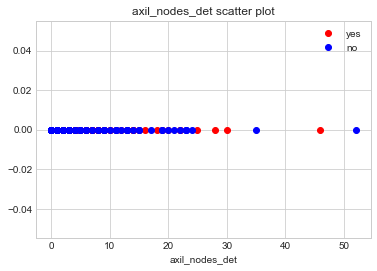

In [28]:
plt.plot(haberman_y['axil_nodes_det'],np.zeros_like(haberman_y['axil_nodes_det']),'ro',label='yes')
plt.plot(haberman_n['axil_nodes_det'],np.zeros_like(haberman_n['axil_nodes_det']),'bo',label='no')
plt.title('axil_nodes_det scatter plot')
plt.xlabel('axil_nodes_det')
plt.legend()
plt.show()

Here we can observe that more tha 75 % of the patients have axil_nodes less than or equal to 20.

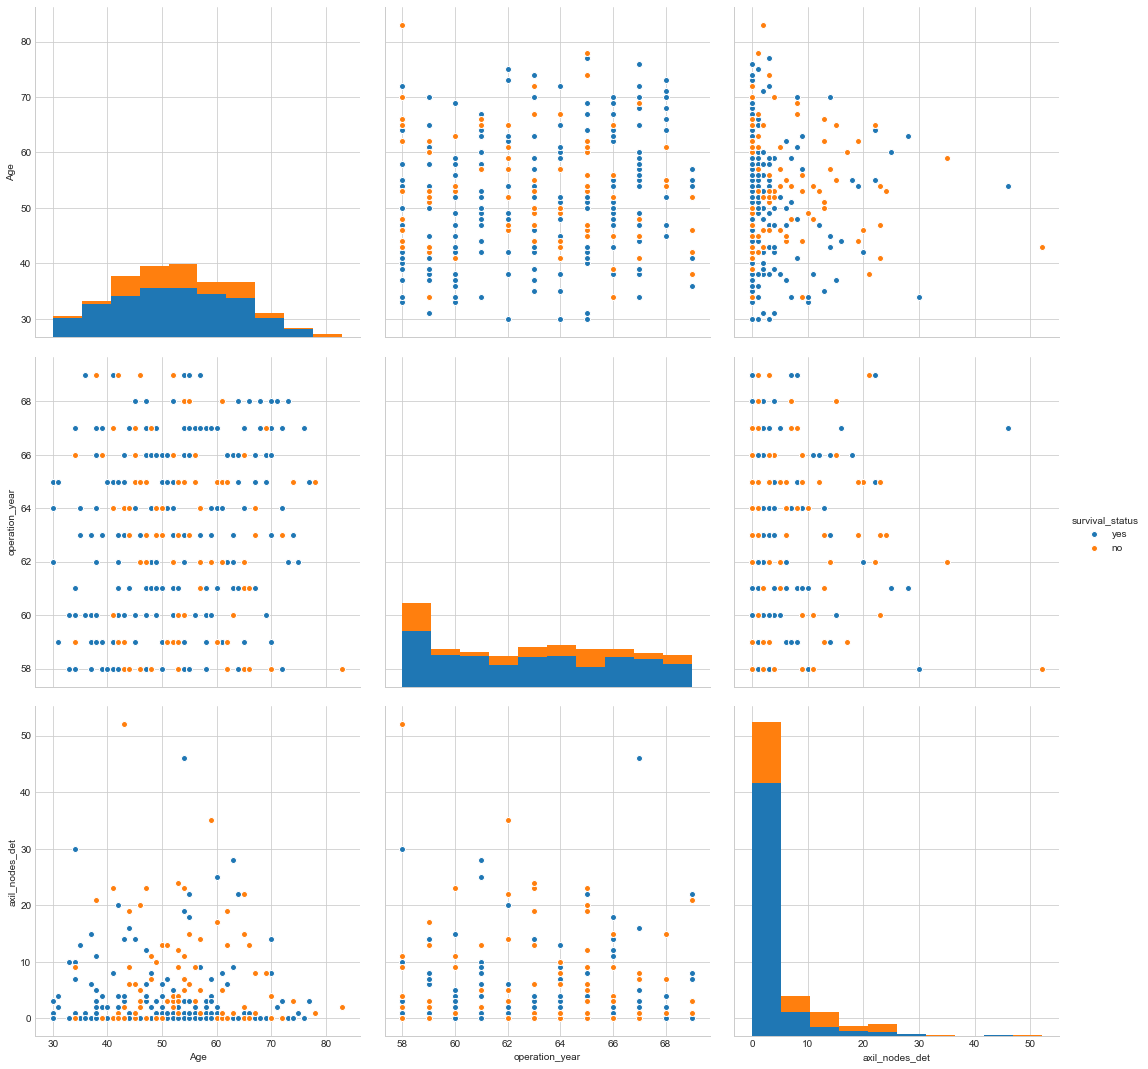

In [29]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='survival_status', size=5)
plt.show()

 From this pairplot we cannot identify which two features are more helpful for the classification. Because the most of the data on the plots are overlapping and we cannot linearly seperate them.

# Results:

So form the above exploratory data analysis we can say tha we cannot seperate both the classes linearly.

And the dataset is not a balanced dataset because the datapoints for both the calsses are not equal.

In [47]:
haberman['survival_status'][haberman['Age']>=80]

305    no
Name: survival_status, dtype: object